### 1. Import Libraries

In [1]:
#Importing Basic Libraries
import matplotlib.pyplot as plt
import pandas as pd

### 2. Load Data

In [2]:
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 3. Basic Data Exploration

In [3]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### Some points to note out from this data:
- BMI: Higher BMI is associated with an increased risk of stroke.
- Age: Advanced age is a significant risk factor for stroke, with the risk increasing as individuals get older.
- Gender: Men and postmenopausal women have a higher risk of stroke compared to premenopausal women.
- Smoking Status: Smoking significantly increases the risk of stroke due to the harmful effects of tobacco on blood vessels.
- Heart Disease: People with heart disease have a higher risk of stroke, as both conditions share similar risk factors and underlying vascular issues.

In [5]:
#Percentage of missing values in the dataset
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


In [6]:
#Because our dataset contains some missing values will fill in them
from sklearn.impute import KNNImputer

# Creating the KNNImputer object
imputer = KNNImputer(n_neighbors=5)

# Extracting the 'bmi' column
bmi_column = df['bmi']

# Filling missing values in the 'bmi' column
bmi_filled = imputer.fit_transform(bmi_column.values.reshape(-1, 1))

# Assigning the filled 'bmi' column back to df
df['bmi'] = bmi_filled

# Displaying the updated DataFrame
print(df)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-

### 4. Exploratory Data Analysis

#####  From the points we noted above we'd like to create Histograms and pie charts since we know they might be related to stroke

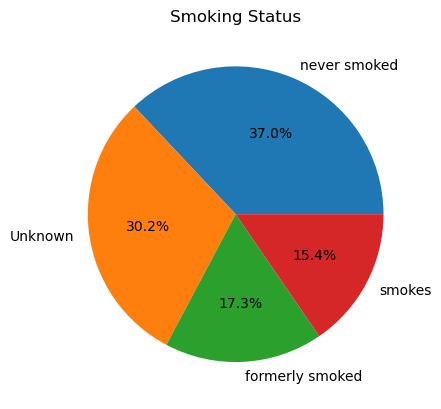

In [7]:
%matplotlib inline
df_home = df['smoking_status'].value_counts().reset_index()

plt.pie(df_home['smoking_status'], labels=df_home['index'], autopct='%1.1f%%')
plt.title('Smoking Status')


plt.show()


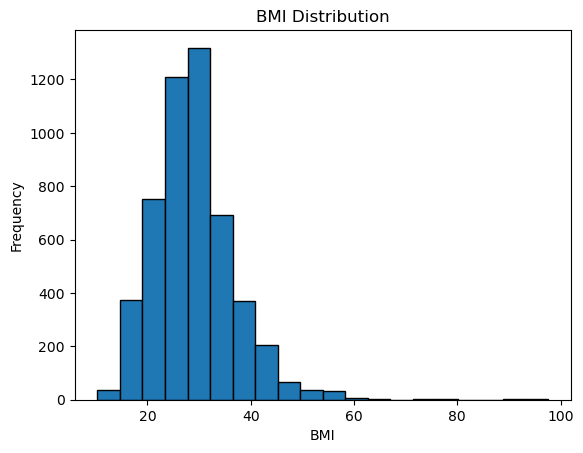

In [8]:
# Plotting the histogram
plt.hist(df.bmi, bins=20, edgecolor='black')

# Adding labels and title
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')

# Displaying the histogram
plt.show()


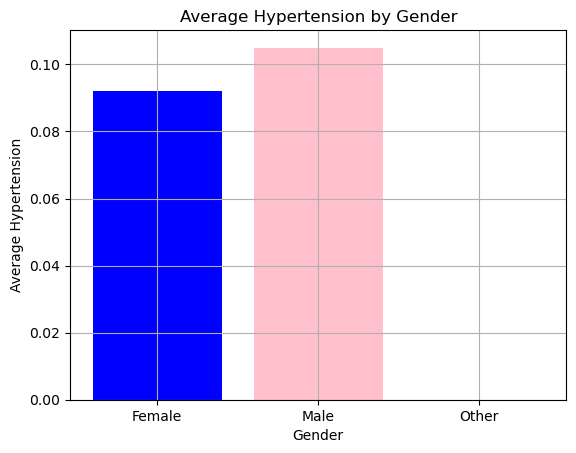

In [9]:
hyp = df.groupby('gender')['hypertension'].mean().reset_index()

# Plotting the bar chart
plt.bar(hyp['gender'], hyp['hypertension'], color=['blue', 'pink'])

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Average Hypertension')
plt.title('Average Hypertension by Gender')
plt.grid()

# Displaying the bar chart
plt.show()


### 5. Feature Selection

In [10]:
X = df.drop('stroke', axis= 'columns')
y = df['stroke']

In [11]:
df = df.drop(['id'], axis= 1)

In [12]:
df = df.replace("Yes", 1)
df = df.replace("No", 0)
df = df.replace("Urban", 1)
df = df.replace("Rural", 0)
df = df.replace(["Male", "Female", "Other"], [1, 2, 0])
df = df.replace(["formerly smoked","never smoked","smokes","Unknown"], [1,0,2,3])
df = df.replace(["Private", "Self-employed"], [0,1])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.600000,1,1
1,2,61.0,0,0,1,1,0,202.21,28.893237,0,1
2,1,80.0,0,1,1,0,0,105.92,32.500000,0,1
3,2,49.0,0,0,1,0,1,171.23,34.400000,2,1
4,2,79.0,1,0,1,1,0,174.12,24.000000,0,1


In [13]:
from sklearn.preprocessing import OneHotEncoder
df['work_type'] = df['work_type'].astype(str)

# Separate categorical and numerical features
categorical_features = ['work_type']  # Add other categorical columns if needed
numerical_features = [col for col in df.columns if col not in categorical_features]

# One-hot encode the categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(df[categorical_features])

# Combine encoded categorical features and numerical features
X = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))
X[numerical_features] = df[numerical_features]

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### 6. Modelling

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size= 0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()

rf.fit(X_train,y_train)
rf.score(X_test,y_test)

1.0